**Importing the Training Dataset**

This dataset consists of tweets and their classification of toxicity levels.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATASET_ENCODING = "ISO-8859-1"
dataframe = pd.read_csv("./Dataset/train.csv", encoding = DATASET_ENCODING)
dataframe.head()



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [33]:
dataframe

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Distribution of Toxic Behaviors in Tweets')

Text(0.5, 0, 'Type of Toxic Behavior')

Text(0, 0.5, 'Count')

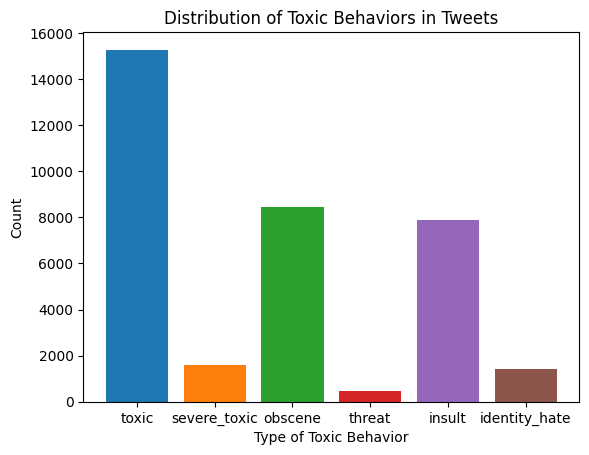

In [34]:
counts = dataframe.iloc[:,2:].sum()

# Create a stacked bar chart
plt.bar(counts.index, counts, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
plt.title("Distribution of Toxic Behaviors in Tweets")
plt.xlabel("Type of Toxic Behavior")
plt.ylabel("Count")
plt.show()


**Massaging the Dataset**

We don't need the levels of toxicity, we only need to know if the tweet is toxic or non-toxic. Hence, removing the un-necessary columns and adding target column (0 - Toxic, 1 - Non-Toxic). 

In [35]:
dataframe["target"] = [ 1 if row["toxic"] == 1 or row["severe_toxic"] == 1 or row["obscene"] == 1 or row["threat"] == 1 or row["insult"] == 1 or row["identity_hate"] == 1 else 0 for index, row in dataframe.iterrows()]
dataframe = dataframe.drop(labels=["toxic","severe_toxic","obscene","threat","insult","identity_hate","id"], axis=1)
dataframe.head()

,comment_text,target
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


**Visualizations**

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Distribution of Toxic and Non-Toxic Tweets')

Text(0.5, 0, 'Tweet Type')

Text(0, 0.5, 'Count')

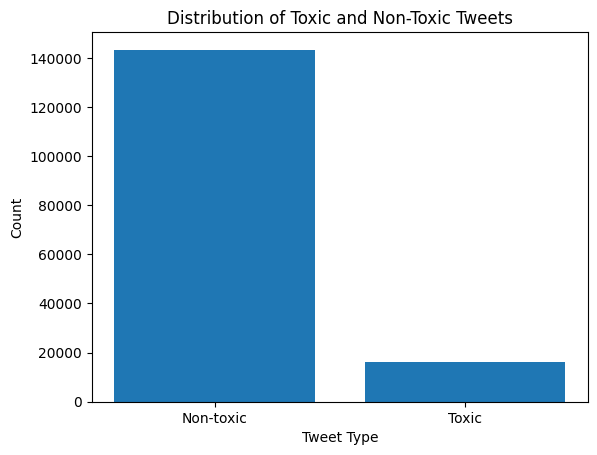

In [36]:
# Count the number of toxic and non-toxic tweets
counts = dataframe["target"].value_counts()

# Create a bar chart
plt.bar(["Non-toxic", "Toxic"], counts)
plt.title("Distribution of Toxic and Non-Toxic Tweets")
plt.xlabel("Tweet Type")
plt.ylabel("Count")
plt.show()

**Splitting the dataset for Train and Test**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(dataframe["comment_text"],dataframe["target"] ,random_state=71, test_size=0.33, shuffle=True)

**Preprocessing the Training dataset**

Preprocessing, both training and testing dataset. 
1. Remove URL's 
2. Remove mentions and hashtags
3. Remove special characters and punctuation
4. Convert to lowercase
5. Remove extra whitespace

In [81]:
import re

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = str(tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    # Remove mentions and hashtags
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r"#[A-Za-z0-9]+", "", tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r"[^a-zA-Z0-9]", " ", tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove extra whitespace
    tweet = re.sub(r"\s+", " ", tweet).strip()
    return tweet


X_train = [preprocess_tweet(tweet) for tweet in X_train]
X_test = [preprocess_tweet(tweet) for tweet in X_test]

**Initilizing TFID Vectorizer of SkLearn for feature extraction**

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')


**Naive Bayes Classifier**

In [99]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline

# Initialize classifier
nb_clf = MultinomialNB()

# Build the pipeline
nb_pipeline = make_pipeline(vectorizer, nb_clf)

# Fit the model to training data
nb_pipeline.fit(X_train, Y_train)

# Predict on testing data
nb_y_pred = nb_pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, nb_y_pred)
print("Accuracy:", accuracy)
hamming_loss = hamming_loss(Y_test, nb_y_pred)
print("Hamming Loss: ",hamming_loss)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

Accuracy: 0.9182665831101996
Hamming Loss:  0.08173341688980042


**SVM Classifier**

In [98]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the pipeline
svm_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=300)),
    ('svm', SVC(kernel='linear'))
])

# Fit the pipeline to the training data
svm_pipeline.fit(X_train, Y_train)

# Evaluate the pipeline on the test data
svm_y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(Y_test, svm_y_pred)
print("Accuracy:", accuracy)
# hamming_loss = hamming_loss(Y_test, y_pred)
# print("Hamming Loss: ",hamming_loss)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svd', TruncatedSVD(n_components=300)),
                ('svm', SVC(kernel='linear'))])

Accuracy: 0.9417193642112459


**Decision Tree Classifier**

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier()


# Define pipeline for Random Forest
rf_pipeline = Pipeline([
    ('vect', vectorizer),
    ('clf', rf_clf)
])

# Train and fit the models
rf_pipeline.fit(X_train, Y_train)

# Predict using the models
rf_prediction = rf_pipeline.predict(X_test)

# Evaluate the models
rf_accuracy = rf_pipeline.score(X_test, Y_test)

print("Random Forest accuracy:", rf_accuracy)


Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier())])

Random Forest accuracy: 0.9548035473518297


In [108]:
nb_accuracy = accuracy_score(Y_test,nb_y_pred)
nb_recall = recall_score(Y_test,nb_y_pred)
nb_precision = precision_score(Y_test,nb_y_pred)
nb_f1 = f1_score(Y_test,nb_y_pred)
print("Naive Bayes Accuracy: ",nb_accuracy)
print("Naive Bayes Recall: ",nb_recall)
print("Naive Bayes Precision: ",nb_precision)
print("Naive Bayes F1 Score: ",nb_f1)

Naive Bayes Accuracy:  0.9182665831101996
Naive Bayes Recall:  0.22036969916636462
Naive Bayes Precision:  0.9983579638752053
Naive Bayes F1 Score:  0.3610451306413301


In [106]:
rf_accuracy = accuracy_score(Y_test,rf_prediction)
rf_recall = recall_score(Y_test,rf_prediction)
rf_precision = precision_score(Y_test,rf_prediction)
rf_f1 = f1_score(Y_test,rf_prediction)
print("Random Forest Accuracy: ",rf_accuracy)
print("Random Forest Recall: ",rf_recall)
print("Random Forest Precision: ",rf_precision)
print("Random Forest F1 Score: ",rf_f1)

Random Forest Accuracy:  0.9548035473518297
Random Forest Recall:  0.6406306632837985
Random Forest Precision:  0.8990335707019329
Random Forest F1 Score:  0.7481481481481482


In [105]:
svm_accuracy = accuracy_score(Y_test,svm_y_pred)
svm_recall = recall_score(Y_test,svm_y_pred)
svm_precision = precision_score(Y_test,svm_y_pred)
svm_f1 = f1_score(Y_test,svm_y_pred)
print("SVM Accuracy: ",svm_accuracy)
print("SVM Recall: ",svm_recall)
print("SVM Precision: ",svm_precision)
print("SVM F1 Score: ",svm_f1)

SVM Accuracy:  0.9417193642112459
SVM Recall:  0.4797027908662559
SVM Precision:  0.9304042179261863
SVM F1 Score:  0.6330264259237116


In [100]:
combine_pred = []
# Y_test_list = list(Y_test.values)


for i in range(len(X_test)):
    pred_1 = svm_y_pred[i]
    pred_2 = nb_y_pred[i]
    pred_3 = rf_prediction[i]
    if pred_1 == 1 or pred_2 == 1 or pred_3 == 1:
        combine_pred.append(1)
    else:
        combine_pred.append(0)


combined_accuracy = accuracy_score(Y_test,combine_pred)
combined_recall = recall_score(Y_test,combine_pred)
combined_precision = precision_score(Y_test,combine_pred)
combined_f1 = f1_score(Y_test,combine_pred)
print("Combined Accuracy: ",combined_accuracy)
print("Combined Recall: ",combined_recall)
print("Combined Precision: ",combined_precision)
print("Combined F1 Score: ",combined_f1)

Combined Accuracy:  0.9564936667995975
Combined Recall:  0.6719826023921711
Combined Precision:  0.8851754595368823
Combined F1 Score:  0.7639847532708356


**Initilizing Tweepy API Object**

<font color=red><b>The below code needs Twitter Key to run<b></font>

In [19]:
import tweepy
import pandas as pd

CONSUMER_KEY = "<Insert Your Key Here>"
CONSUMER_SECRET = "<Insert Your Key Here>"
OAUTH_TOKEN = "<Insert Your Key Here>"
OAUTH_TOKEN_SECRET = "<Insert Your Key Here>"

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

# Create the API object
api = tweepy.API(auth)

**Define the username of the user whose tweets and comments you want to retrieve**

<font color=red><b>The below code needs Twitter Key to run<b></font>

In [20]:
username = 'thedemocrats'
# Get the latest 100 tweets of the user
tweets = api.user_timeline(screen_name=username, count=400, tweet_mode='extended')

# Create a list to store the data
data = []


**Building the Dataset of the Tweets extracted**

<font color=red><b>The below code needs Twitter Key to run<b></font>

**Skip this step:**
The code that retrieves data from the Twitter API and builds a dataframe can be skipped since we have already retrieved the tweets from Twitter and created a CSV file.

In [21]:
import time
# For each tweet, get the top 1000 comments and store the data in the list
for tweet in tweets:
    try:
        comments = api.search_tweets(q='to:'+username, since_id=tweet.id, count=1000, tweet_mode='extended')
    except tweepy.TweepyException as e:
        if "Too Many Requests" in str(e):
            print("Rate limit exceeded. Waiting for 15 minutes.")
            time.sleep(15 * 60)  # Wait for 15 minutes
            comments = api.search_tweets(q='to:'+username, since_id=tweet.id, count=1000, tweet_mode='extended')
        else:
            print(e)
    for comment in comments:
        if(comment.user.screen_name != username):
            data.append({'tweet_id': comment.id, 'tweet': comment.full_text, 'user of the tweet': comment.user.screen_name})

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data)

Rate limit exceeded. Waiting for 15 minutes.


Load the dataframe using CSV file. 

In [110]:
df = pd.read_csv("./Dataset/democrats_twitter.csv", encoding = DATASET_ENCODING)
df

,tweet_id,tweet,user of the tweet
0,1654250127173775361,@TheDemocrats Remember that the @DNC fuels div...,RealTemanson
1,1654250115471908864,@TheDemocrats Ã°ÂÂ¤Â¡Ã°ÂÂ¤Â¡ https://t.co/vk...,DV652
2,1654250112816668675,@TheDemocrats https://t.co/kFgwj7VPLo,YourFrickenJob
3,1654249310245244929,@TheDemocrats This is a lie.,broncos19801
4,1654249258571137024,@TheDemocrats https://t.co/1YnYE3zK3H,BroomallBr42259
...,...,...,...
78,1654247225143226368,@TheDemocrats Ã°ÂÂ¤Â£Ã°ÂÂÂÃ°ÂÂ¤Â£Ã°ÂÂÂ...,soniclore
79,1654247144570617856,"@TheDemocrats Uh, now we will just have to wai...",FrankBa99193526
80,1654249358760591361,@TheDemocrats A complete disaster.,sco19663538
81,1654250160120033283,@TheDemocrats https://t.co/ISaNqjwcVQ,Bill27992994


**Running the prediction across all 3 models**

In [111]:
inp_data = df["tweet"]
pred_1 = [1 if svm_pipeline.predict([i]) == [1] else 0 for i in inp_data]
pred_2 = [1 if rf_pipeline.predict([i]) == [1] else 0 for i in inp_data]
pred_3 = [1 if nb_pipeline.predict([i]) == [1] else 0 for i in inp_data]


n = len(pred_1)
combine_pred = []
for i in range(n):
    if pred_1[i] == 1 or pred_2[i] == 1 or pred_3[i] == 1:
        combine_pred.append(1)
    else:
        combine_pred.append(0)


**Adding the prediction column to the dataframe**

In [112]:
new_column_series = pd.Series(combine_pred)

# add the new column to the original dataframe
df.insert(loc=3,column='Prediction', value=new_column_series)
df

,tweet_id,tweet,user of the tweet,Prediction
0,1654250127173775361,@TheDemocrats Remember that the @DNC fuels div...,RealTemanson,0
1,1654250115471908864,@TheDemocrats Ã°ÂÂ¤Â¡Ã°ÂÂ¤Â¡ https://t.co/vk...,DV652,0
2,1654250112816668675,@TheDemocrats https://t.co/kFgwj7VPLo,YourFrickenJob,0
3,1654249310245244929,@TheDemocrats This is a lie.,broncos19801,0
4,1654249258571137024,@TheDemocrats https://t.co/1YnYE3zK3H,BroomallBr42259,0
...,...,...,...,...
78,1654247225143226368,@TheDemocrats Ã°ÂÂ¤Â£Ã°ÂÂÂÃ°ÂÂ¤Â£Ã°ÂÂÂ...,soniclore,0
79,1654247144570617856,"@TheDemocrats Uh, now we will just have to wai...",FrankBa99193526,0
80,1654249358760591361,@TheDemocrats A complete disaster.,sco19663538,0
81,1654250160120033283,@TheDemocrats https://t.co/ISaNqjwcVQ,Bill27992994,0


<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Distribution of Toxic and Non-Toxic Tweets')

Text(0.5, 0, 'Tweet Type')

Text(0, 0.5, 'Count')

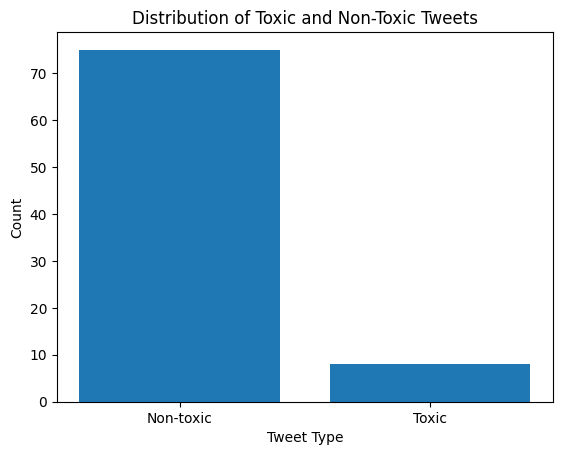

In [113]:
counts = df["Prediction"].value_counts()

# Create a bar chart
plt.bar(["Non-toxic", "Toxic"], counts)
plt.title("Distribution of Toxic and Non-Toxic Tweets")
plt.xlabel("Tweet Type")
plt.ylabel("Count")
plt.show()

**Identifying Toxic Users**

In [114]:
toxic_users = [ i["user of the tweet"] for index,i in df.iterrows() if i["Prediction"] == 1]
len(toxic_users)

8

In [115]:
toxic_users_unique = list(set(toxic_users))
len(toxic_users_unique)

8

**These are the toxic users**

In [116]:
toxic_users_unique


['toast36884',
 'NancyFi61103202',
 'Dana59226229',
 'Al1492',
 'wi46180626',
 'maudrit',
 'Retiredaf3',
 'RayAnde34649425']

**Creating a Social Network**

<font color=red><b>The below code needs Twitter Key to run<b></font>

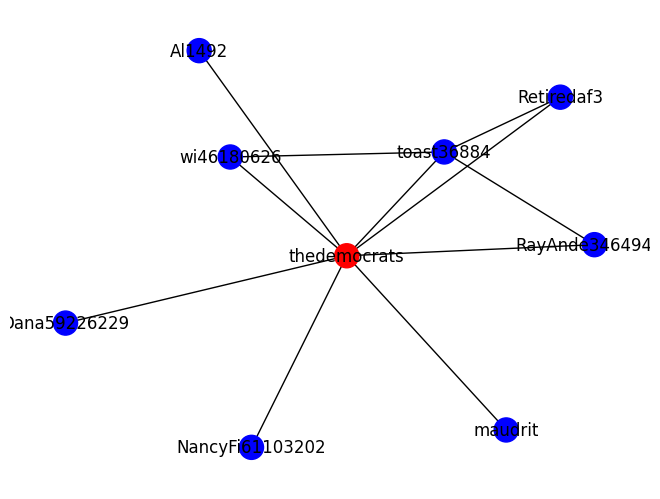

In [117]:
import tweepy
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
username = "thedemocrats"

users = api.lookup_users(screen_name=toxic_users_unique)
for user in users:
    G.add_node(user.screen_name, name=user.name, color="blue")
G.add_node(username,name=username,color="red")

for user_1 in toxic_users_unique:
    for user_2 in toxic_users_unique:
        if(user_1 != user_2):
            try:
                friendship = api.get_friendship(source_screen_name=user_1,target_screen_name=user_2)[0]
            except tweepy.TweepyException as e:
                if "Too Many Requests" in str(e):
                    print("Rate limit exceeded. Waiting for 15 minutes.")
                    time.sleep(15 * 60)  # Wait for 15 minutes
                    friendship = api.get_friendship(source_screen_name=user_1,target_screen_name=user_2)[0]
                else:
                    print(e)
                # print(friendship)
            if friendship.following:
                    G.add_edge(user_1,user_2)
            

node_colors = {}
for node in G.nodes():
    if node == username:
        node_colors[node] = 'red'
    elif node in toxic_users_unique:
        node_colors[node] = 'blue'

for user in toxic_users_unique:
    G.add_edge(username,user)

nx.draw(G, with_labels=True, node_color=[node_colors[node] for node in G.nodes()])
plt.show()


**Extract the tweets of all the toxic users**

<font color=red><b>The below code needs Twitter Key to run<b></font>

**Skip this step:**
The code that retrieves data from the Twitter API and builds a dataframe can be skipped since we have already retrieved the tweets from Twitter and created a CSV file.

In [118]:
# Define list of Twitter usernames
usernames = toxic_users_unique

# Define a function to collect tweets and metadata for a given user
def get_user_tweets(username):
    tweets = []
    metadata = []
    try:
        get_tweets = tweepy.Cursor(api.user_timeline, screen_name=username, tweet_mode='extended')
    except tweepy.TweepyException as e:
                if "Too Many Requests" in str(e):
                    print("Rate limit exceeded. Waiting for 15 minutes.")
                    time.sleep(15 * 60)  # Wait for 15 minutes
                    get_tweets = tweepy.Cursor(api.user_timeline, screen_name=username, tweet_mode='extended')
                else:
                    print(e) 
    for tweet in get_tweets.items():
        tweets.append(tweet.full_text)
        metadata.append({'created_at': tweet.created_at,
                         'id': tweet.id,
                         'user_screen_name': tweet.user.screen_name,
                         'user_name': tweet.user.name,
                         'user_location': tweet.user.location,
                         'user_followers_count': tweet.user.followers_count,
                         'user_friends_count': tweet.user.friends_count,
                         'user_created_at': tweet.user.created_at})
    return tweets, metadata

# Define an empty dataframe to store the data
df = pd.DataFrame()

# Collect data for each user and append to the dataframe
for username in usernames:
    try:
        tweets, metadata = get_user_tweets(username)
    except tweepy.TweepyException as e:
                if "Too Many Requests" in str(e):
                    print("Rate limit exceeded. Waiting for 15 minutes.")
                    time.sleep(15 * 60)  # Wait for 15 minutes
                    tweets, metadata = get_user_tweets(username)
                else:
                    print(e) 
    temp_df = pd.DataFrame({'username': username,
                            'tweet': tweets,
                            'metadata': metadata})
    df = pd.concat([df, temp_df], ignore_index=True)

# Display the dataframe
df


,username,tweet,metadata
0,toast36884,@TheDemocrats Who the hell you trying to bull ...,"{'created_at': 2023-05-04 22:22:36+00:00, 'id'..."
1,NancyFi61103202,@NEWSMAX Just bring back the Clydesdales,"{'created_at': 2023-05-04 22:16:53+00:00, 'id'..."
2,NancyFi61103202,RT @gatewaypundit: Navy SEAL Who Killed Bin La...,"{'created_at': 2023-05-04 22:15:42+00:00, 'id'..."
3,NancyFi61103202,RT @MattWalshBlog: Democracy was a mistake,"{'created_at': 2023-05-04 22:15:15+00:00, 'id'..."
4,NancyFi61103202,"RT @SarahisCensored: The loudest, most disrupt...","{'created_at': 2023-05-04 22:13:21+00:00, 'id'..."
...,...,...,...
17217,RayAnde34649425,@POTUS A pistol was used by a BLACK guy to own...,"{'created_at': 2023-02-14 21:38:20+00:00, 'id'..."
17218,RayAnde34649425,Why did the government derail a train to kill ...,"{'created_at': 2023-02-14 21:36:25+00:00, 'id'..."
17219,RayAnde34649425,@krassenstein If they kept the guy in jail pro...,"{'created_at': 2023-02-14 21:28:20+00:00, 'id'..."
17220,RayAnde34649425,@BarackObama @MichelleObama FU gay guy,"{'created_at': 2023-02-14 21:26:43+00:00, 'id'..."


In [121]:
df = pd.read_csv("./Dataset/toxic_users_tweets.csv", encoding = DATASET_ENCODING)
df

,username,tweet,metadata
0,toast36884,@TheDemocrats Who the hell you trying to bull ...,"{'created_at': datetime.datetime(2023, 5, 4, 2..."
1,NancyFi61103202,@NEWSMAX Just bring back the Clydesdales,"{'created_at': datetime.datetime(2023, 5, 4, 2..."
2,NancyFi61103202,RT @gatewaypundit: Navy SEAL Who Killed Bin La...,"{'created_at': datetime.datetime(2023, 5, 4, 2..."
3,NancyFi61103202,RT @MattWalshBlog: Democracy was a mistake,"{'created_at': datetime.datetime(2023, 5, 4, 2..."
4,NancyFi61103202,"RT @SarahisCensored: The loudest, most disrupt...","{'created_at': datetime.datetime(2023, 5, 4, 2..."
...,...,...,...
17217,RayAnde34649425,@POTUS A pistol was used by a BLACK guy to own...,"{'created_at': datetime.datetime(2023, 2, 14, ..."
17218,RayAnde34649425,Why did the government derail a train to kill ...,"{'created_at': datetime.datetime(2023, 2, 14, ..."
17219,RayAnde34649425,@krassenstein If they kept the guy in jail pro...,"{'created_at': datetime.datetime(2023, 2, 14, ..."
17220,RayAnde34649425,@BarackObama @MichelleObama FU gay guy,"{'created_at': datetime.datetime(2023, 2, 14, ..."


**Aggregate all tweets for each user to form a document**

In [57]:
# Generic inputs for most ML tasks
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML
import numpy as np
from sklearn.datasets import fetch_20newsgroups

rawdata = df

rawdata.head()
unique_users = rawdata['username'].unique()
user_tweets = dict()

#create a document for each users (dictionary of documents)
for user in unique_users :
    tweets = rawdata[rawdata['username'] == user ]['tweet']
    user_tweets[user] = ""
    for tweet in tweets :
        user_tweets[user] = user_tweets[user] + " " + tweet

print(user_tweets)

,username,tweet,metadata
0,toast36884,@TheDemocrats Who the hell you trying to bull ...,"{'created_at': 2023-05-04 22:22:36+00:00, 'id'..."
1,NancyFi61103202,@NEWSMAX Just bring back the Clydesdales,"{'created_at': 2023-05-04 22:16:53+00:00, 'id'..."
2,NancyFi61103202,RT @gatewaypundit: Navy SEAL Who Killed Bin La...,"{'created_at': 2023-05-04 22:15:42+00:00, 'id'..."
3,NancyFi61103202,RT @MattWalshBlog: Democracy was a mistake,"{'created_at': 2023-05-04 22:15:15+00:00, 'id'..."
4,NancyFi61103202,"RT @SarahisCensored: The loudest, most disrupt...","{'created_at': 2023-05-04 22:13:21+00:00, 'id'..."


{'toast36884': ' @TheDemocrats Who the hell you trying to bull shit. He had the worse inflation in 40 years and did it all on his own.', 'NancyFi61103202': ' @NEWSMAX Just bring back the Clydesdales RT @gatewaypundit: Navy SEAL Who Killed Bin Laden Disgusted by Navy’s New Recruitment Tactic: ‘I Can’t Believe I Fought for This’ https://t… RT @MattWalshBlog: Democracy was a mistake RT @SarahisCensored: The loudest, most disruptive trans activists that were removed from the Texas House Gallery on Tuesday are being expos… @TheDemocrats I’m sure it was as filled with crap SEAL who snuffed Bin Laden slams Navy for drag queen recruiter: ‘Can’t believe I fought for this bulls**t’ · American Wire News https://t.co/UbOg1NLqzS @RepAndyBiggsAZ How about the whole Administration RT @RepAndyBiggsAZ: It\'s long past time to impeach Biden\'s Department of Homeland Security Secretary Mayorkas.\n\nWhat are we waiting for? RT @WallStreetSilv: The European Union is officially insane.\n\nThe buyout scheme 

**K-Means Clustering**

In [122]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords

# all tweets of user is one document
documents = user_tweets.values()


# Preprocess the text
def preprocess(text):
    return text.lower()

preprocessed_documents = [preprocess(doc) for doc in documents]


# Extract features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(preprocessed_documents)

# Determine the optimal number of clusters using silhouette score
# vary the range if needed
n_clusters_range = range(2, 6)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

# Assign each document to a cluster
document_clusters = kmeans.predict(X)

# Display the results
clustered_docs = pd.DataFrame({"Document": documents, "Cluster": document_clusters})
print(clustered_docs)

#user and values 
user_cluster = clustered_docs.copy().merge(pd.DataFrame(user_tweets.keys(), columns = ['users']), left_index = True, right_index = True)


user_cluster.head()

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=5, random_state=42)

                                            Document  Cluster
0   @TheDemocrats Who the hell you trying to bull...        2
1   @NEWSMAX Just bring back the Clydesdales RT @...        1
2   @eclipsethis2003 Lying bitch @TheRickyDavila ...        3
3   RT @brixwe: https://t.co/gtwqKXFajG RT @Makis...        1
4   @ManhattanDA This marine did nothing wrong! T...        0
5   @glennkirschner2 AMERICAN HERO! https://t.co/...        4
6   @larryhuynh Yeah ok. Skippy @donwinslow @Sara...        0
7   @GOPoversight @RepJamesComer @ChuckGrassley A...        0


,Document,Cluster,users
0,@TheDemocrats Who the hell you trying to bull...,2,toast36884
1,@NEWSMAX Just bring back the Clydesdales RT @...,1,NancyFi61103202
2,@eclipsethis2003 Lying bitch @TheRickyDavila ...,3,Dana59226229
3,RT @brixwe: https://t.co/gtwqKXFajG RT @Makis...,1,Al1492
4,@ManhattanDA This marine did nothing wrong! T...,0,wi46180626


**Clustering Visualizations-2D**

[[ 123.75301    -10.287419 ]
 [   7.462699     0.7615902]
 [ -44.77988   -121.17684  ]
 [  -2.5326068   49.730328 ]
 [  67.53138    -46.53923  ]
 [  64.44503   -134.08543  ]
 [   7.668983   -64.73926  ]
 [ -48.53741    -42.415096 ]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

Text(123.75301, -10.287419, 'toast36884')

Text(7.462699, 0.7615902, 'NancyFi61103202')

Text(-44.77988, -121.17684, 'Dana59226229')

Text(-2.5326068, 49.730328, 'Al1492')

Text(67.53138, -46.53923, 'wi46180626')

Text(64.44503, -134.08543, 'maudrit')

Text(7.668983, -64.73926, 'Retiredaf3')

Text(-48.53741, -42.415096, 'RayAnde34649425')

Text(0.5, 1.0, 'K-means  Clustering')

Text(0.5, 0, 't-SNE Dimension 1')

Text(0, 0.5, 't-SNE Dimension 2')

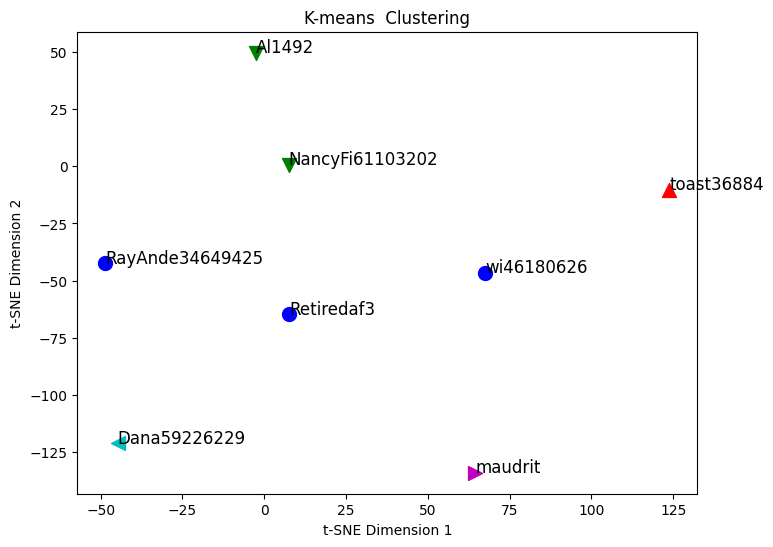

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# (Same dataset and preprocess function as before)


# (Same clustering code as before)

# Perform dimensionality reduction using t-SNE
#scalar
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_2d = tsne.fit_transform(X.toarray())

print(X_2d)

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', 's', 'p']

for i in range(len(X_2d)):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], s=100, c=colors[document_clusters[i]], marker=markers[document_clusters[i]])
    plt.text(X_2d[i, 0], X_2d[i, 1], unique_users[i], fontsize=12)

plt.title('K-means  Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


**Clustering Visualizations-3D**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(-144.93188, 186.75844, 'toast36884')

Text(68.590904, -133.93262, 'NancyFi61103202')

Text(-13.073225, 219.36607, 'Dana59226229')

Text(-158.01703, -114.49514, 'Al1492')

Text(160.97557, 169.77995, 'wi46180626')

Text(-81.789795, 15.813759, 'maudrit')

Text(282.18134, 21.685421, 'Retiredaf3')

Text(46.743755, -124.09233, 'RayAnde34649425')

Text(0.5, 0.92, 'K-means Clustering')

Text(0.5, 0, 't-SNE Dimension 1')

Text(0.5, 0.5, 't-SNE Dimension 2')

Text(0.5, 0, 't-SNE Dimension 3')

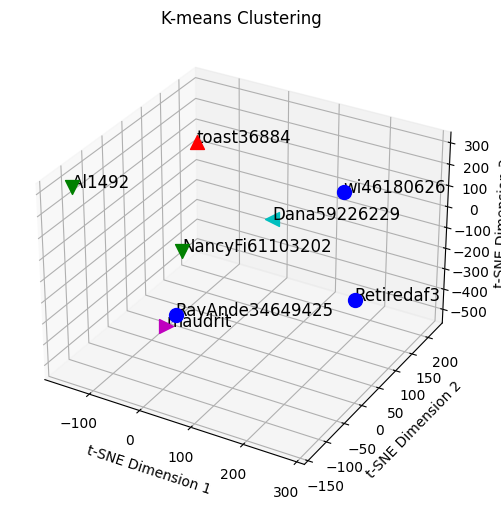

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from nltk.corpus import stopwords

# (Same dataset, preprocess function, feature extraction, and clustering code as before)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
X_3d = tsne.fit_transform(X.toarray())

# Plot the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', 's', 'p']

for i in range(len(X_3d)):
    ax.scatter(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], s=100, c=colors[document_clusters[i]], marker=markers[document_clusters[i]])
    ax.text(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], unique_users[i], fontsize=12)

ax.set_title('K-means Clustering')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()


**Listing all token words**

In [75]:
print(len(X.toarray()))
temp = X.toarray()
print(vectorizer.get_feature_names_out())
allW = vectorizer.get_feature_names_out()
words =[ ] 


#print(words)

8
['00' '000' '000ft' ... 'zzrmqtpqfk' 'zzyfnac0sl' 'zzzzzzzz']


In [76]:
usr = list(unique_users)
def get_keywords_of_cluster(cluster, vect_x) :
    sets = []
    for c in cluster :
        indx = usr.index(c)
        x2 = x_[indx]
        avg = sum(x2)/float(len(x2))
        l = list()
        for i in range(len(x2)) :
            if x2[i] > avg :
                l.append(allW[i])
        sets.append(set(l))
    s = sets[0]
    for i in range(1,len(sets)):
        s = s.intersection(sets[i])
    return s

In [77]:
#convert matrix
x_ = X.toarray()

**Identifying commmon tokens in the clusters**

In [79]:
cluster_keywords = dict()

groups_keyword = dict()

for clus in set(user_cluster['Cluster']):
    users = user_cluster[user_cluster['Cluster'] == clus]['users'].values.tolist()
    keywords = get_keywords_of_cluster(users,x_)
    if len(users) >= 2 :
        groups_keyword[clus] = keywords
    cluster_keywords[clus] = keywords
    
    
for key in groups_keyword :
    print(key,groups_keyword[key])
    print("\n\n")

0 {'good', 'leave', 'away', 'hey', 'kamalaharris', 'city', 'police', 'expect', 'care', 'proud', 'notice', 'repadamschiff', 'nytimes', 'watch', 'chrisdjackson', 'news', 'china', 'parents', 'job', 'lies', 'red', 'republicans', 'children', 'speakerpelosi', 'vote', 'party', 'second', 'man', 'thing', 'shut', 'going', 'virus', 'lost', 'mental', 'wife', 'look', 'women', 'killing', 'guns', 'racist', 'crap', 'cnn', 'days', 'power', 'means', 'brain', 'fault', 'loser', 'word', 'kids', 'corrupt', 'ones', 'run', 'baby', 'just', 'buy', 'hide', 'countries', 'impeach', 'giving', 'happened', 'moron', 'case', 'accountable', 'coming', 'hit', 'half', 'drug', 'ukraine', 'trying', 'hurt', 'gas', 'worst', 'arrested', 'answer', 'end', 'act', 'need', 'american', 'sad', 'change', 'win', 'far', 'safe', 'prices', 'looked', 'll', 'reasons', 'died', 'break', 'close', 'https', 'think', 'court', 'doctor', 'making', 'work', 'dbongino', 'thedemocrats', 'money', 'following', 'black', 'terrible', 'christian', 'day', 'tru